In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from matplotlib.cm import get_cmap
# import addcopyfighandler

from IPython.core.display import HTML
from IPython.display import display

import model2 as mod
import model_fsolve as modf

import simu as sim

import fluids as fds
from CoolProp.CoolProp import PropsSI

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tables

import pprint


In [2]:
# Define the fluid and the conditions
fluid = 'MPG'

p_bar = 2
p = 101325*p_bar  # pressure in Pa
T_C = 25
T = 273.15 + T_C  # temperature in K (25°C)

glycol_rate = 0.4

par = {}

par["eps"] = 0.001

par["rho"] = PropsSI('D', 'P', p, 'T', T, f'INCOMP::{fluid}[{glycol_rate}]') # kg/m3

par["eta"] = PropsSI('V', 'P', p, 'T', T, f'INCOMP::{fluid}[{glycol_rate}]')
par["nu"] = par["eta"]/par["rho"]

In [25]:
# Heat exchanger inputs --------------------------------------------------

# V4.41
# ------

par["N"] = 300

par["Lx"] = (2*(50+10+635)+100+2*(26+10+10))/1000 # m, not used in the system calculation
par["inter_riser"] = 0.0005

par["EP"] = 10
par["N_per_EP"] = int(par["N"]/par["EP"])

petit = (par["N_per_EP"]-1)*[par["inter_riser"]]
long = [0.013]
par["Ly"] = (par["EP"]-1)*(petit+long)+petit # m

par["tot_width"] = 0.990
# par["l_riser"] = (par["tot_width"]-par["inter_riser"]*(par["N"]-1))/par["N"]
par["l_riser"] = 0.00284

par["h_riser"] = 0.0021

par["Dx"] = 2*(par["h_riser"]*par["l_riser"])/(par["h_riser"]+par["l_riser"]) # m, not used in the system calculation
par["Din"] = 0.018 # m
par["Dout"] = par["Din"] # m

par["manifold"] = "tubular" # or rectangular

coeff = 10.
par["coeff_Kxin"] = coeff
par["coeff_Kxout"] = coeff
par["coeff_Kyin"] = coeff
par["coeff_Kyout"] = coeff

# Z-type or U-type

# par["ref"] = par["N"]-1 # U
par["ref"] = 0 # Z 

# Parameters

par["theta"] = 90.

par["rough"] = 0.001 # aluminium = 0.001 mm
# end of inputs

par['Ax'] = math.pi*(par['Dx']/2)**2

# Manifold tubulaire ou rectangulaire

if par['manifold'] == 'tubular':
    par['Ain'] = math.pi*(par['Din']/2)**2
    par['Aout'] = math.pi*(par['Dout']/2)**2
elif par['manifold'] == 'rectangular': # rectangulaire (SPRING ou autre)
    par['Ain'] = par['h_man']*par['l_man']
    par['Aout'] = par['Ain']

par['sch'] = 'exchanger'

# 'Crane' or 'perso'
par['method'] = 'Crane'

In [43]:
# Heat exchanger inputs --------------------------------------------------

# V4.41, ligne de 8
# ------
par["N_panels"] = 4
par["N"] = 300 * par["N_panels"]
par["N_per_panel"] = int(par["N"]/par["N_panels"])

par["Lx"] = (2*(50+10+635)+100+2*(26+10+10))/1000 # m, not used in the system calculation
par["inter_riser"] = 0.00035

par["EP"] = 10
par["N_per_EP"] = int(par["N_per_panel"]/par["EP"])

petit = (par["N_per_EP"]-1)*[par["inter_riser"]]
long = [0.013]
Ly_list = (par["EP"]-1)*(petit+long)+petit # m


long_field = [0.02]

par["Ly"] = (par["N_panels"]-1)*(Ly_list+long_field)+Ly_list

par["tot_width"] = 0.990
# par["l_riser"] = (par["tot_width"]-par["inter_riser"]*(par["N"]-1))/par["N"]
par["l_riser"] = 0.003

par["h_riser"] = 0.002

par["Dx"] = 2*(par["h_riser"]*par["l_riser"])/(par["h_riser"]+par["l_riser"]) # m, not used in the system calculation
par["Din"] = 0.018 # m
par["Dout"] = par["Din"] # m

par["manifold"] = "tubular" # or rectangular

coeff = 10.
par["coeff_Kxin"] = coeff
par["coeff_Kxout"] = coeff
par["coeff_Kyin"] = coeff
par["coeff_Kyout"] = coeff

# Z-type or U-type

# par["ref"] = par["N"]-1 # U
par["ref"] = 0 # Z 

# Parameters

par["theta"] = 90.

par["rough"] = 0.001 # aluminium = 0.001 mm
# end of inputs

par['Ax'] = math.pi*(par['Dx']/2)**2

# Manifold tubulaire ou rectangulaire

if par['manifold'] == 'tubular':
    par['Ain'] = math.pi*(par['Din']/2)**2
    par['Aout'] = math.pi*(par['Dout']/2)**2
elif par['manifold'] == 'rectangular': # rectangulaire (SPRING ou autre)
    par['Ain'] = par['h_man']*par['l_man']
    par['Aout'] = par['Ain']

par['sch'] = 'exchanger'

# 'Crane' or 'perso'
par['method'] = 'Crane'

In [35]:
list_Q_L

array([  60,  100,  300,  500,  800, 1000, 1300])

In [36]:
df_c = dic['V4.41'][1][1]

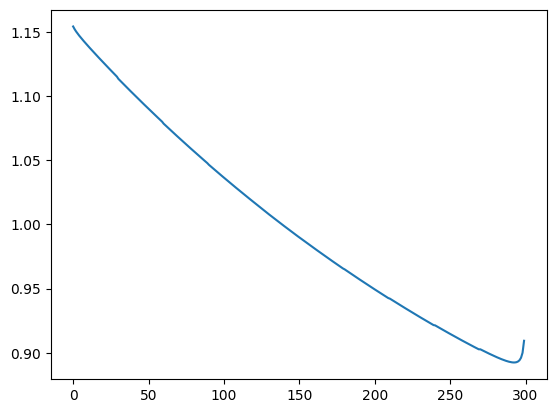

In [42]:
plt.plot(df_c['qx']/(1/3))

In [34]:
df_c

[            Pin          Pout        qx
 0    401.469299  8.574853e-22  0.218457
 1    401.469271  1.313465e-01  0.218215
 2    401.469213  2.620959e-01  0.218009
 3    401.469127  3.922605e-01  0.217824
 4    401.469013  5.218479e-01  0.217649
 ..          ...           ...       ...
 295  403.295573  1.931769e+01  0.187003
 296  403.634597  1.931872e+01  0.187125
 297  404.171043  1.931943e+01  0.187357
 298  405.136580  1.931984e+01  0.187824
 299  407.338706  1.931998e+01  0.188956
 
 [300 rows x 3 columns],
             Pin          Pout        qx
 0    686.519398 -6.589249e-23  0.384736
 1    686.519230  3.748168e-01  0.384018
 2    686.518934  7.476182e-01  0.383415
 3    686.518511  1.118468e+00  0.382874
 4    686.517960  1.487404e+00  0.382367
 ..          ...           ...       ...
 295  688.805773  5.083036e+01  0.297713
 296  689.736896  5.083290e+01  0.298050
 297  691.214457  5.083464e+01  0.298688
 298  693.881898  5.083562e+01  0.299973
 299  699.991354  5.083596e+01

In [ ]:
# Test d'un seul débit

# par['QF'] = 100/3600000 # m3/s (0.000278 m3/s = 1000 L/h) (le premier nombre est en L/h)
# # Speed and Reynolds at inlet manifold
# par['U'] = par['QF']/par['Ain']
# par['Reman'] = par['U']*(par['rho']*par['Din'])/par['eta']
# tabl,res = modf.PL_fsolve(par,par['sch'],True)

In [5]:
dic = {}

In [44]:
# list_Q_L = np.array([64,152,245,319,402,449,597,700,1000]) # L/h
# list_Q_L = np.array([272,478,652,856,1094])
list_Q_L = np.array([300,500,800,1000])
list_Q = list_Q_L/3600000 # m3/s
dic["V4.41_petit_mur_x4"] = (sim.modf_parametric_flow_rates(par,list_Q))

8.333333333333333e-05
0.0001388888888888889
0.00022222222222222223
0.0002777777777777778


In [45]:
286/60

4.766666666666667

In [ ]:
list_PL_lin = []
list_PL_bend = []
list_Re = []

for i in range(len(list_Q)):
    u = (list_Q[i]/par["Ax"])/par["N"]

    Re = fds.core.Reynolds(u,par["Dx"],par["rho"],mu=par["eta"]) # viscosité dynamique mu ou eta

    list_Re.append(Re)

    f = fds.friction.friction_factor(Re = Re)
    K = f*(par["Lx"]/par["Dx"])
    list_PL_lin.append(((par["rho"]/2)*K*u**2)/1000) # en kPa

    # K2 = fds.fittings.bend_rounded_Crane(par["Dx"],angle=90.,bend_diameters=2.)

    # list_PL_bend.append((par["rho"]/2)*K2*u**2)

In [ ]:
list_Re = np.array(list_Re)

In [ ]:
list_Q_M = [272,478,652,856,1094]
list_PL_M = [0.485,0.977,1.336,1.941,2.8]

In [49]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=list_Q_L, y=np.array(dic["V4.41"][0]),
                    mode='markers',
                    name='V4.41'))

fig.add_trace(go.Scatter(x=list_Q_L/4, y=np.array(dic["V4.41_petit_mur_x4"][0]),
                    mode='markers',
                    name='4 V4.41'))
# fig.add_trace(go.Scatter(x=list_Q_L, y=list_PL_M,
#                     mode='markers',
#                     name='MICOE datasheet'))
# fig.add_trace(go.Scatter(x=list_Re, y=np.array(list_PL_lin),
#                     mode='markers',
#                     name='MICOE lin',xaxis='x2'))

    # Set x-axis title
fig.update_xaxes(title_text="Time")

fig.update_layout(
    
    yaxis=dict(
    title='Pressure loss (kPa)'),
    
    xaxis=dict(title="Flow rate (L/h)"),

    xaxis2={'title':'Reynolds','anchor': 'y', 'overlaying': 'x', 'side': 'top'}
    
    )

# fig.update_layout(
#     xaxis1=dict(range=[list_Q_L.min(), list_Q_L.max()]),
#     xaxis2=dict(range=[list_Re.min(), list_Re.max()]),
#     )

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=0,
        r=0,
        b=50,
        t=50,
        pad=1
    ),
)

fig.add_annotation(text=f"Temperature = {T-273.15} °C, Pressure = {p_bar} bar, glycol_level = {glycol_rate}%",
                  xref="paper", yref="paper",
                  x=0.05, y=0.9, showarrow=False)

fig.show()

In [46]:
df = pd.DataFrame()
df['Flow_rate_nom'] = list_Q_L
df['DP'] = dic['V4.41_petit_mur_x4'][0]

In [47]:
df.to_csv('modelV4_petit_mur_x4.csv')

In [ ]:
pprint.pprint(par)